In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("hello")

hello


In [4]:
sample = np.array([1,2,3])

sample

array([1, 2, 3])

In [122]:
sample = np.array([ [1, 2, 3],
                    [4, 5, 6] ])
sample

array([[1, 2, 3],
       [4, 5, 6]])

In [128]:
sample[:, 0]

array([1, 4])

In [6]:
sample = np.zeros((3, 3))

sample

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [7]:
sample = np.ones((2, 3))

sample

array([[1., 1., 1.],
       [1., 1., 1.]])

In [8]:
sample = np.full((3, 2), 9)
sample

array([[9, 9],
       [9, 9],
       [9, 9]])

In [9]:
sample = np.eye(5)

sample

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [11]:
sample = np.random.random(5)

sample

array([0.58547161, 0.54578809, 0.84696308, 0.67537767, 0.16457935])

In [16]:
sample = np.arange(3.5, 10.5, 2.1)
sample

array([3.5, 5.6, 7.7, 9.8])

In [18]:
sample = np.linspace(0, 10, 5)
sample

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [22]:
sample = np.arange(1, 10, 1)
reshape_sample = sample.reshape(3, 3)
reshape_sample

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [103]:
a = np.array([  [ 10,  20, -30],
                [-40,  50,  60],
                [ 70,  80,  90]  ])

b = np.array([  [ 1,  2, -3],
                [-4,  5,  6],
                [ 7,  8,  9]  ])

print("a:\n", a)
print("b:\n", b)

a:
 [[ 10  20 -30]
 [-40  50  60]
 [ 70  80  90]]
b:
 [[ 1  2 -3]
 [-4  5  6]
 [ 7  8  9]]


In [68]:
print("a + b:\n", a + b)
print("a - b:\n", a - b)

a + b:
 [[ 11  22 -33]
 [-44  55  66]
 [ 77  88  99]]
a - b:
 [[  9  18 -27]
 [-36  45  54]
 [ 63  72  81]]


NumPy配列の乗算結果については数学でよく目にする結果と異なるため注意が必要です。<br>
ひとまず結果を確認してみます。

In [69]:
print("a * b:\n", a * b)
print("a / b:\n", a / b)

a * b:
 [[ 10  40  90]
 [160 250 360]
 [490 640 810]]
a / b:
 [[10. 10. 10.]
 [10. 10. 10.]
 [10. 10. 10.]]


通常の行列の乗算と言われると、下記のような行列積(ドット積)をイメージするのではないかと思います。<br>

$$
C = A \cdot B
$$

しかし、NumPyの乗算符号(*)はアダマール積と呼ばれる要素同士の乗算で定義されています。<br>
同様に除算符号(/)は要素同士の除算で定義されていることに注意しておきましょう。<br>

ではドット積を計算したい場合はどうすればよいかというと2通りの方法があります。<br>
一つ目はnp.dot()というメソッドを使用する方法です。

In [75]:
print("np.dot(a, b):\n", np.dot(a, b))

np.dot(a, b):
 [[-280 -120 -180]
 [ 180  650  960]
 [ 380 1260 1080]]


もう一つの方法は乗算符号*を@に置き換える方法です。

In [70]:
print("a @ b:\n", a @ b)

a @ b:
 [[-280 -120 -180]
 [ 180  650  960]
 [ 380 1260 1080]]


どちらの方法を使用しても計算結果は変わりませんが@を使用する方法を強くお奨めします。<br>
例えば以下のような計算をすることを考えます。

$$
E = A \cdot B \cdot C \cdot D
$$

Eを求めるプログラムを@を用いた場合は<br>
``` python
E = A @ B @ C @ D
```
という書き方になります。一方でnp.dot()を用いた場合は<br>
``` python
E = np.dot(A, np.dot(B, np.dot(C, D)))
```
となり、非常に読みづらいプログラムになってしまうため基本的には@を使用しましょう。

NumPy配列は累乗計算が可能です。ただし結果は乗算の時と同様にアダマール積になることに注意しましょう。

In [104]:
print("a ** 2:", a ** 2)

a ** 2: [[ 100  400  900]
 [1600 2500 3600]
 [4900 6400 8100]]


逆行列を計算する場合は、np.linalg.inv()を使用します。<br>
linalgはliner algebra(線形代数)の意味で、行列演算で必要なメソッドが格納されています。

In [73]:
np.linalg.inv(b)

array([[-0.00847458, -0.11864407,  0.07627119],
       [ 0.22033898,  0.08474576,  0.01694915],
       [-0.18926554,  0.01694915,  0.03672316]])

## 6-3. ブロードキャスト



行列を扱っていると、各要素に対して同じ操作を行いたい場合があります。<br>
通常のリストの場合はfor文を使用して各要素に対して操作するはずですが、<br>
NumPyの場合はブロードキャストという機能を使用してまとめて操作することができます。

In [51]:
a * 0.1

array([[0.1, 0.2, 0.3],
       [0.4, 0.5, 0.6],
       [0.7, 0.8, 0.9]])

In [46]:
a + np.array([10, 20, 30])

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In [45]:
a + np.array([  [100], 
                [200],
                [300] ])

array([[101, 102, 103],
       [204, 205, 206],
       [307, 308, 309]])

In [109]:
x = np.linspace(0.1, 10, 100)
print(x)

[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8
  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2
  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.
  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8
  9.9 10. ]


## 6-4. 一括操作

ブロードキャスト以外にもNumPy配列に対して様々な一括操作が提供されています。<br>
下記のように数学的な操作のほとんどは一括処理が可能です。

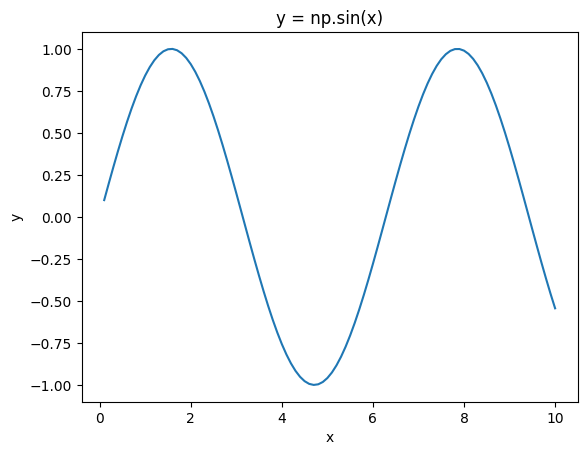

In [120]:
y = np.sin(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = np.sin(x)")
plt.show()

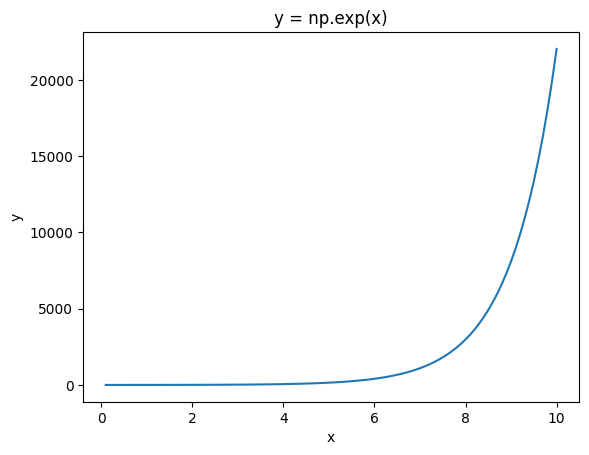

In [121]:
y = np.exp(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = np.exp(x)")
plt.show()

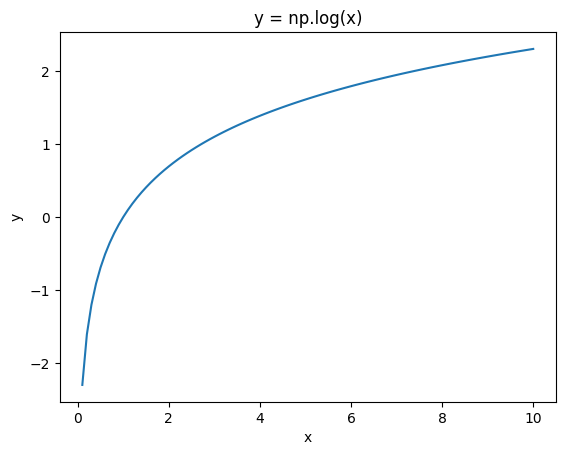

In [119]:
y = np.log(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = np.log(x)")
plt.show()

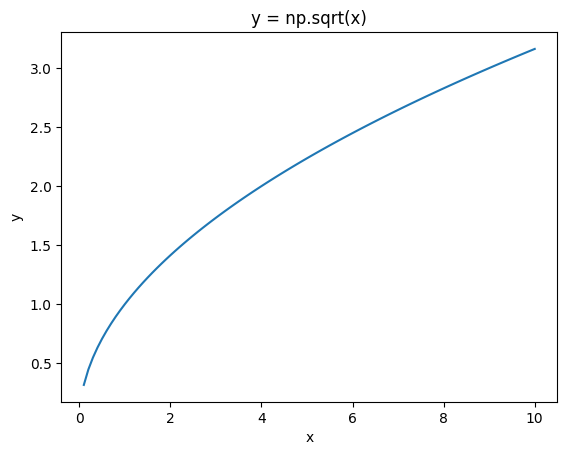

In [117]:
y = np.sqrt(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = np.sqrt(x)")
plt.show()

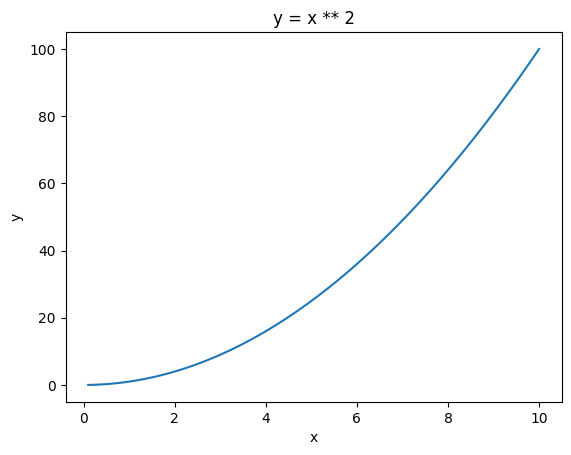

In [116]:
y = x ** 2
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = x ** 2")
plt.show()